# NON-Linear Data

In [2]:
import pandas as pd


In [4]:
df=pd.DataFrame({"temp":[0,20,40,60,80,100],"pressure":[0.0002,0.0012,0.012,0.09,0.12,0.27]})
df

,temp,pressure
0,0,0.0002
1,20,0.0012
2,40,0.0120
3,60,0.0900
4,80,0.1200
5,100,0.2700


In [5]:
#take values
x=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [7]:
y

array([2.0e-04, 1.2e-03, 1.2e-02, 9.0e-02, 1.2e-01, 2.7e-01])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin=LinearRegression()

In [21]:
mod=lin.fit(x,y)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

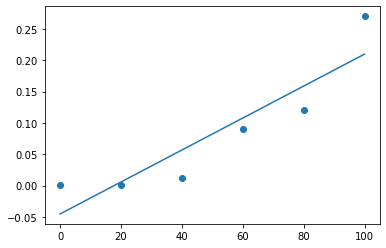

In [20]:
plt.scatter(x,y)
plt.plot(x,lin.predict(x))

In [22]:
mod.score(x,y)

0.8265354318062791

# polynomial regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly=PolynomialFeatures(degree=3)

In [26]:
x_poly=poly.fit_transform(x)

In [27]:
lin.fit(x_poly,y)

LinearRegression()

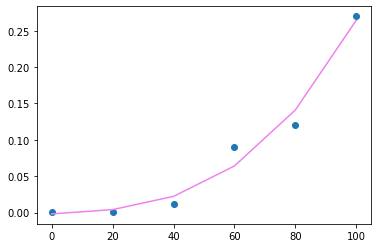

In [32]:
plt.scatter(x,y)
plt.plot(x,lin.predict(x_poly),color="violet")

# cLASSIFICATION pROBLEMS-Logistic Regression

In [33]:
stud=pd.read_csv("Students.csv")
stud.head()

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [34]:
stud.STATUS.value_counts()

1    60
0    40
Name: STATUS, dtype: int64

In [36]:
stud.shape

(100, 3)

In [37]:
stud=stud.sample(frac=1)
stud.head()

,JEEPRE,JEEMAINS,STATUS
33,52.045405,69.432860,1
73,60.457886,73.094998,1
25,62.271014,69.954458,1
74,58.840956,75.858448,1
99,74.775893,89.529813,1


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train,test=train_test_split(stud,test_size=0.3,random_state=1234)

In [40]:
train.shape

(70, 3)

In [41]:
test.shape

(30, 3)

In [42]:
train.STATUS.value_counts()

1    44
0    26
Name: STATUS, dtype: int64

In [43]:
y_train=train["STATUS"]
x_train=train[["JEEPRE","JEEMAINS"]]


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lc=LogisticRegression()

In [46]:
mod=lc.fit(x_train,y_train)

In [47]:
mod.score(x_train,y_train)

0.8857142857142857

In [48]:
mod.coef_

array([[0.1895368 , 0.22017036]])

In [49]:
y_test=test["STATUS"]
x_test=test[["JEEPRE","JEEMAINS"]]


In [50]:
pred=mod.predict(x_test)

In [51]:
mod.predict_proba(x_test)

array([[9.74590953e-01, 2.54090471e-02],
       [9.91931988e-01, 8.06801174e-03],
       [9.25832519e-01, 7.41674814e-02],
       [5.40462392e-04, 9.99459538e-01],
       [9.57186282e-01, 4.28137178e-02],
       [4.93560405e-01, 5.06439595e-01],
       [7.14640490e-05, 9.99928536e-01],
       [9.29365997e-03, 9.90706340e-01],
       [9.93129121e-01, 6.87087930e-03],
       [9.87435505e-01, 1.25644947e-02],
       [9.01300017e-01, 9.86999834e-02],
       [2.33908676e-04, 9.99766091e-01],
       [1.35523063e-04, 9.99864477e-01],
       [9.99832141e-01, 1.67859351e-04],
       [1.90790822e-03, 9.98092092e-01],
       [4.76865241e-05, 9.99952313e-01],
       [9.95794810e-01, 4.20518967e-03],
       [9.58705226e-02, 9.04129477e-01],
       [3.16244590e-01, 6.83755410e-01],
       [8.66374571e-02, 9.13362543e-01],
       [4.30572205e-01, 5.69427795e-01],
       [6.98172019e-01, 3.01827981e-01],
       [9.69440964e-01, 3.05590363e-02],
       [1.89283029e-05, 9.99981072e-01],
       [8.665149

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.8666666666666667

In [56]:
con_mat=confusion_matrix(y_test,pred)
con_mat

array([[12,  2],
       [ 2, 14]], dtype=int64)

In [58]:
1-accuracy

0.1333333333333333

<AxesSubplot:>

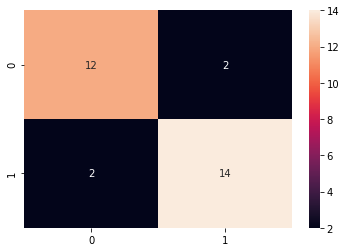

In [59]:
import seaborn as sns
sns.heatmap(con_mat,annot =True)

In [60]:
x_test.shape


(30, 2)

# Practice

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.DataFrame({'Temp':[0,20,40,60,80,100], 'Pressure':[0.0002,0.0012,0.012,0.0900,0.12,0.27]})
df

,Temp,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0120
3,60,0.0900
4,80,0.1200
5,100,0.2700


In [66]:
x=pd.DataFrame(df["Temp"])
x

,Temp
0,0
1,20
2,40
3,60
4,80
5,100


In [68]:
y=pd.DataFrame(df["Pressure"])
y

,Pressure
0,0.0002
1,0.0012
2,0.0120
3,0.0900
4,0.1200
5,0.2700


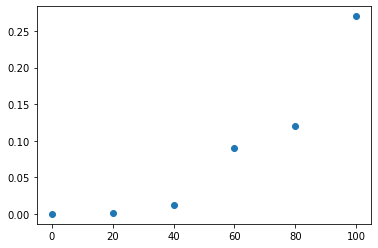

In [69]:
plt.scatter(x,y)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lin=LinearRegression()

In [73]:
mod=lin.fit(x,y)

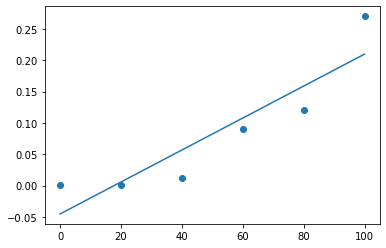

In [74]:
plt.scatter(x,y)
plt.plot(x,mod.predict(x))

In [75]:
mod.score(x,y)

0.8265354318062791

### Polynomial Regression

In [76]:
from sklearn.preprocessing import  PolynomialFeatures

In [82]:
poly=PolynomialFeatures(degree=3)

In [83]:
x_poly=poly.fit_transform(x)

In [85]:
lin.fit(x_poly,y)

LinearRegression()

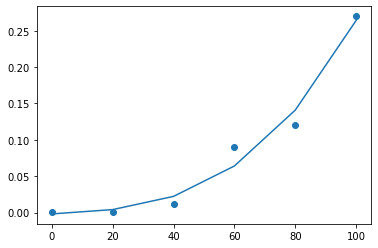

In [86]:
plt.scatter(x,y)
plt.plot(x,mod.predict(x_poly))

## LOgistic Rergression`

In [90]:
df=pd.read_csv("Students.csv")
df.head()


,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [91]:
df.shape

(100, 3)

In [97]:
df=df.sample(frac=1)

In [99]:
df.head()

,JEEPRE,JEEMAINS,STATUS
94,89.845807,45.358284,1
21,89.676776,65.799366,1
31,85.404519,57.051984,1
83,57.238706,59.514282,1
57,32.577200,95.598548,0


In [101]:
x=df[["JEEPRE","JEEMAINS"]]
print(type(x))
x

<class 'pandas.core.frame.DataFrame'>


,JEEPRE,JEEMAINS
94,89.845807,45.358284
21,89.676776,65.799366
31,85.404519,57.051984
83,57.238706,59.514282
57,32.577200,95.598548
...,...,...
69,66.746719,60.991394
2,35.847409,72.902198
12,82.307053,76.481963
15,53.971052,89.207350


In [103]:
y=pd.DataFrame(df.STATUS)
y
type(y)

pandas.core.frame.DataFrame

### Modelling

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
log=LinearRegression()

In [125]:
mod=log.fit(x_train,y_train)

In [126]:
mod.score(x_train,y_train)

0.5951203271139873

In [109]:
mod.coef_

array([[0.01484087, 0.01394217]])

In [128]:
tr,te=train_test_split(df,test_size=0.3,random_state=1234)


In [129]:
tr.head()

,JEEPRE,JEEMAINS,STATUS
57,32.577200,95.598548,0
67,49.072563,51.883212,0
61,35.286113,47.020514,0
24,77.924091,68.972360,1
51,99.272527,60.999031,1


In [131]:
te.shape

(30, 3)

In [132]:
tr_x=tr[["JEEPRE","JEEMAINS"]]
tr_y=tr["STATUS"]

In [133]:
m1=log.fit(tr_x,tr_y)

In [151]:
m1.score(tr_x,tr_y)

0.5938428813736671

In [147]:
te_x=te[["JEEPRE","JEEMAINS"]]
te_y=te["STATUS"]

In [154]:
pred=m1.predict(te_x)

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(te_y,pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [140]:
te_y

48    1
25    1
46    1
85    1
15    1
55    0
79    0
82    1
80    1
33    1
84    1
28    0
35    0
73    1
5     0
59    1
2     0
21    1
92    0
45    0
98    1
3     1
34    0
38    0
95    1
50    1
6     1
68    1
54    0
14    0
Name: STATUS, dtype: int64

In [145]:
pred

array([0.92274243, 0.59560681, 0.81602124, 0.87703992, 0.71338132,
       0.28866435, 0.54693474, 0.62666671, 0.9762287 , 0.44239272,
       1.11387884, 0.34687103, 0.26767305, 0.60822563, 0.18103546,
       0.83694075, 0.25255352, 0.93790194, 0.07502225, 0.37471608,
       0.43430074, 0.76687957, 0.29422333, 0.4260575 , 0.63471568,
       0.90111758, 0.90570159, 1.12685194, 0.17559651, 0.34411376])